In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Historic Generation Data

## https://data.nationalgrideso.com/carbon-intensity1/historic-generation-mix/r/historic_gb_generation_mix

In [2]:
gen_data = pd.read_csv("df_fuel_ckan.csv")
#historic generation data 

In [3]:
gen_data.head()
#check the data 

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00+00,8396.0,15038.0,7098.0,273.0,246.0,2506.0,0.0,0.0,0.0,...,7.5,0.0,0.0,0.0,0.0,100.0,22.7,22.7,1.5,69.8
1,2009-01-01 00:30:00+00,8526.0,15097.0,7086.0,253.0,245.0,2485.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1
2,2009-01-01 01:00:00+00,8492.0,15083.0,7073.0,228.0,246.0,2450.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.4,70.2
3,2009-01-01 01:30:00+00,8335.0,15015.0,7063.0,212.0,246.0,2420.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1
4,2009-01-01 02:00:00+00,8304.0,14975.0,7051.0,196.0,246.0,2349.0,0.0,0.0,0.0,...,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.3,70.3


In [4]:
gen_data.info()
#checking non null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253323 entries, 0 to 253322
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATETIME          253323 non-null  object 
 1   GAS               253323 non-null  float64
 2   COAL              253323 non-null  float64
 3   NUCLEAR           253323 non-null  float64
 4   WIND              253323 non-null  float64
 5   HYDRO             253323 non-null  float64
 6   IMPORTS           253323 non-null  float64
 7   BIOMASS           253323 non-null  float64
 8   OTHER             253323 non-null  float64
 9   SOLAR             253323 non-null  float64
 10  STORAGE           253323 non-null  float64
 11  GENERATION        253323 non-null  float64
 12  CARBON_INTENSITY  253323 non-null  float64
 13  LOW_CARBON        253323 non-null  float64
 14  ZERO_CARBON       253323 non-null  float64
 15  RENEWABLE         253323 non-null  float64
 16  FOSSIL            25

In [5]:
gen_data['DATETIME'] = pd.to_datetime(gen_data['DATETIME'])

In [6]:

# Remove the timezone information from the datetime column
gen_data['DATETIME'] = gen_data['DATETIME'].dt.tz_localize(None)



In [7]:
gen_data.columns

Index(['DATETIME', 'GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS',
       'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE', 'GENERATION',
       'CARBON_INTENSITY', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL',
       'GAS_perc', 'COAL_perc', 'NUCLEAR_perc', 'WIND_perc', 'HYDRO_perc',
       'IMPORTS_perc', 'BIOMASS_perc', 'OTHER_perc', 'SOLAR_perc',
       'STORAGE_perc', 'GENERATION_perc', 'LOW_CARBON_perc',
       'ZERO_CARBON_perc', 'RENEWABLE_perc', 'FOSSIL_perc'],
      dtype='object')

# Market Index Price Data 

## https://www.elexonportal.co.uk/article/view/33409?cachebust=ihte1zettt

In [8]:
import pandas as pd
import glob


# Define the selected filenames or patterns
selected_files = ['MID_2014.csv', 'MID_2015.csv', 'MID_2016.csv','MID_2017.csv',
                  'MID_2018.csv','MID_2019.csv','MID_2020.csv','MID_2021.csv'
                  ,'MID_2022.csv','MID_2023.csv']


In [9]:

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through the selected files
for file_pattern in selected_files:
    df = pd.read_csv(file_pattern,encoding='latin')
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
market_index_data = pd.concat(dataframes, ignore_index=True)

In [10]:
market_index_data.head()

,Settlement Date,Settlement Period,Market Index Data Provider Id,Market Index Volume (MWh),Market Index Price (£/MWh)
0,01 January 2014,1,APXMIDP,301.50,35.32
1,01 January 2014,1,N2EXMIDP,0.00,0.00
2,01 January 2014,2,APXMIDP,365.65,37.28
3,01 January 2014,2,N2EXMIDP,0.00,0.00
4,01 January 2014,3,APXMIDP,184.00,41.50


In [11]:
#creating a new column with DATETIME 
import datetime
from datetime import datetime
# change the Settlement date to date format 
market_index_data['date'] = market_index_data['Settlement Date'].apply(lambda x: datetime.strptime(x, '%d %B %Y'))
#changing the Settlement period into time 
market_index_data['Time Interval'] = (market_index_data['Settlement Period'] - 1) * 30

market_index_data['date'] = market_index_data['date'].dt.strftime('%Y-%m-%d')
import datetime
market_index_data['Time Format'] = market_index_data['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())


In [12]:
# Convert 'Time Format' column to a string representation of time in HH:MM:SS format
market_index_data['Time Format'] = market_index_data['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))

# Combine 'date' and 'Time Format' columns to create a new 'DATETIME' column with datetime objects
market_index_data['DATETIME'] = pd.to_datetime(market_index_data['date'] + ' ' + market_index_data['Time Format'])

# Convert 'Time Interval' column to a time object and assign it to 'Time Format' column
market_index_data['Time Format'] = market_index_data['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())

In [13]:
market_index_data.columns

Index(['Settlement Date', 'Settlement Period', 'Market Index Data Provider Id',
       'Market Index Volume (MWh)', 'Market Index Price (£/MWh)', 'date',
       'Time Interval', 'Time Format', 'DATETIME'],
      dtype='object')

In [14]:
#market_index_data = market_index_data.drop('DateTime',axis =1)

In [15]:
market_index_data.columns

Index(['Settlement Date', 'Settlement Period', 'Market Index Data Provider Id',
       'Market Index Volume (MWh)', 'Market Index Price (£/MWh)', 'date',
       'Time Interval', 'Time Format', 'DATETIME'],
      dtype='object')

In [16]:
market_index_data.head()

,Settlement Date,Settlement Period,Market Index Data Provider Id,Market Index Volume (MWh),Market Index Price (£/MWh),date,Time Interval,Time Format,DATETIME
0,01 January 2014,1,APXMIDP,301.50,35.32,2014-01-01,0,00:00:00,2014-01-01 00:00:00
1,01 January 2014,1,N2EXMIDP,0.00,0.00,2014-01-01,0,00:00:00,2014-01-01 00:00:00
2,01 January 2014,2,APXMIDP,365.65,37.28,2014-01-01,30,00:30:00,2014-01-01 00:30:00
3,01 January 2014,2,N2EXMIDP,0.00,0.00,2014-01-01,30,00:30:00,2014-01-01 00:30:00
4,01 January 2014,3,APXMIDP,184.00,41.50,2014-01-01,60,01:00:00,2014-01-01 01:00:00


In [17]:
mid_1 = market_index_data.groupby('DATETIME').agg({'Settlement Period': 'first',
                                                   'Market Index Price (£/MWh)': 'sum', 
                                                   'Market Index Volume (MWh)': 'sum'}).reset_index()


we are not considering the Market index provider and calculating the Market index vol and market index price for every settlement period by selecting which provider produces if both providers have values by adding the values of the settlement period of both providers

In [18]:
mid_1.head()

,DATETIME,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
0,2014-01-01 00:00:00,1,35.32,301.50
1,2014-01-01 00:30:00,2,37.28,365.65
2,2014-01-01 01:00:00,3,41.50,184.00
3,2014-01-01 01:30:00,4,36.74,185.15
4,2014-01-01 02:00:00,5,32.04,283.50


# Historic Demand Data

## https://data.nationalgrideso.com/demand/historic-demand-data

In [19]:
import pandas as pd
import glob


# Define the selected filenames or patterns
selected_files = ['demanddata_2009.csv', 'demanddata_2010.csv', 'demanddata_2011.csv','demanddata_2012.csv',
                  'demanddata_2013.csv','demanddata_2014.csv','demanddata_2015.csv','demanddata_2016.csv'
                  ,'demanddata_2017.csv','demanddata_2018.csv','demanddata_2019.csv','demanddata_2020.csv',
                 'demanddata_2021.csv','demanddata(1).csv','demanddata.csv']


In [20]:

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through the selected files
for file_pattern in selected_files:
    df = pd.read_csv(file_pattern)
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
Demand_Data = pd.concat(dataframes, ignore_index=True)




In [21]:
Demand_Data.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
0,01-JAN-2009,1,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,NaN,NaN
1,01-JAN-2009,2,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,NaN,NaN
2,01-JAN-2009,3,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,NaN,NaN
3,01-JAN-2009,4,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,NaN,NaN
4,01-JAN-2009,5,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,NaN,NaN


In [22]:
Demand_Data.tail()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
253577,2023-06-19,44,26074,28088,24393,1055,6538,0,14285,0,5,430,-2,-921,-306,0,-280,1298.0,0.0
253578,2023-06-19,45,25811,27527,24183,1060,6538,0,14285,0,5,292,-2,-789,-322,0,-98,1298.0,10.0
253579,2023-06-19,46,24784,26515,23256,1064,6538,0,14285,0,6,272,-2,-779,-358,0,-86,1274.0,9.0
253580,2023-06-19,47,23080,25660,21736,1051,6538,0,14285,0,4,-476,-2,-806,-316,0,-334,904.0,-142.0
253581,2023-06-19,48,21963,24722,20673,1038,6538,0,14285,0,73,-540,-2,-806,-330,0,-352,825.0,-156.0


In [23]:
import datetime

# Convert 'SETTLEMENT_DATE' column to a datetime object

# Calculate the time interval in minutes and assign it to 'Time Interval' column
Demand_Data['Time Interval'] = (Demand_Data['SETTLEMENT_PERIOD'] - 1) * 30

# Convert 'Time Interval' column to a time object and assign it to 'Time Format' column
Demand_Data['Time Format'] = Demand_Data['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())

# Convert 'Time Format' column to a string representation of time in 'HH:MM:SS' format
Demand_Data['Time Format'] = Demand_Data['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))

# Combine 'SETTLEMENT_DATE' and 'Time Format' columns to create a new 'DATETIME' column with datetime objects
Demand_Data['DATETIME'] = pd.to_datetime(Demand_Data['SETTLEMENT_DATE'] + ' ' + Demand_Data['Time Format'])



In [24]:
Demand_Data.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'Time Interval',
       'Time Format', 'DATETIME'],
      dtype='object')

we have 3 data sets now demand data market index price generation data 

# SSP(system sell price) /SBP (system buy price) data - Elexon data 

## System Sell Price

### https://www.elexonportal.co.uk/article/view/249?cachebust=sptuufkosn

In [25]:
SSP = pd.read_excel('prices.xls','SSP')

In [26]:
SSP.head()

,Date,Run,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,2001-03-27,DF,2.76676,6.23181,5.92955,0.61020,0.12778,-9.97316,28.28724,38.18177,...,7.90359,0.78551,0.13840,8.45620,9.60637,10.54528,9.81334,10.10231,NaN,NaN
1,2001-03-28,DF,10.00696,10.85647,9.28724,9.04365,4.44915,-100.00000,4.00000,15.25000,...,0.00000,13.35298,6.99595,10.18164,9.24505,18.20735,3.57793,6.16488,NaN,NaN
2,2001-03-29,DF,6.43443,6.89398,7.22250,1.99784,15.25000,-100.00000,15.25000,15.25000,...,-26.56463,-3.20714,-5.36642,-11.88932,-15.80997,-18.28517,1.49349,0.14706,NaN,NaN
3,2001-03-30,DF,3.92383,5.81459,5.93008,-0.10113,-15.30681,-20.25186,-11.01626,15.25000,...,4.36315,-66.18367,-9.43636,-8.25770,-10.15610,-10.47089,-9.16298,-5.02416,NaN,NaN
4,2001-03-31,DF,-12.44055,-10.11949,2.47943,5.99630,7.20452,10.62924,7.19239,5.97222,...,9.35580,8.02308,9.02920,6.97000,9.53125,-8.50344,-27.23651,-26.89920,NaN,NaN


In [27]:
SSP_1 = SSP.iloc[:, SSP.columns != 'Run'] 
#removing run column as it is not necessary 

In [28]:
SSP_1.head()

,Date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2001-03-27,2.76676,6.23181,5.92955,0.61020,0.12778,-9.97316,28.28724,38.18177,24.43990,...,7.90359,0.78551,0.13840,8.45620,9.60637,10.54528,9.81334,10.10231,NaN,NaN
1,2001-03-28,10.00696,10.85647,9.28724,9.04365,4.44915,-100.00000,4.00000,15.25000,15.25000,...,0.00000,13.35298,6.99595,10.18164,9.24505,18.20735,3.57793,6.16488,NaN,NaN
2,2001-03-29,6.43443,6.89398,7.22250,1.99784,15.25000,-100.00000,15.25000,15.25000,15.25000,...,-26.56463,-3.20714,-5.36642,-11.88932,-15.80997,-18.28517,1.49349,0.14706,NaN,NaN
3,2001-03-30,3.92383,5.81459,5.93008,-0.10113,-15.30681,-20.25186,-11.01626,15.25000,9.80000,...,4.36315,-66.18367,-9.43636,-8.25770,-10.15610,-10.47089,-9.16298,-5.02416,NaN,NaN
4,2001-03-31,-12.44055,-10.11949,2.47943,5.99630,7.20452,10.62924,7.19239,5.97222,5.83519,...,9.35580,8.02308,9.02920,6.97000,9.53125,-8.50344,-27.23651,-26.89920,NaN,NaN


In [29]:
sd = SSP_1.melt(id_vars='Date',var_name= 'Settlement_Period',
                value_name='System Sell Price(GBP/MWh)')
sd['Settlement_Period'] = sd['Settlement_Period'].astype('int')
#sort by date
sd = sd.sort_values(by=['Date', 'Settlement_Period']).reset_index(drop=True)


In [30]:
sd

,Date,Settlement_Period,System Sell Price(GBP/MWh)
0,2001-03-27,1,2.76676
1,2001-03-27,2,6.23181
2,2001-03-27,3,5.92955
3,2001-03-27,4,0.61020
4,2001-03-27,5,0.12778
...,...,...,...
405045,2023-05-31,46,0.00000
405046,2023-05-31,47,0.00000
405047,2023-05-31,48,0.00000
405048,2023-05-31,49,NaN


In [31]:
sd = sd.dropna()

In [32]:
sd.columns

Index(['Date', 'Settlement_Period', 'System Sell Price(GBP/MWh)'], dtype='object')

In [33]:
SSP_ = sd.reset_index(drop=True)

In [34]:
import datetime

SSP_['Time Interval'] = (SSP_['Settlement_Period']-1)*30
#changing settlement periods to time 

In [35]:
SSP_['Time Format'] = SSP_['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())
#changing into minutes

In [36]:
SSP_['DATETIME'] = SSP_['Date'] + pd.to_timedelta(SSP_['Time Format'].astype(str))


In [37]:
SSP_['DATETIME'] = pd.to_datetime(SSP_['DATETIME'])

In [38]:
SSP_.head()

,Date,Settlement_Period,System Sell Price(GBP/MWh),Time Interval,Time Format,DATETIME
0,2001-03-27,1,2.76676,0,00:00:00,2001-03-27 00:00:00
1,2001-03-27,2,6.23181,30,00:30:00,2001-03-27 00:30:00
2,2001-03-27,3,5.92955,60,01:00:00,2001-03-27 01:00:00
3,2001-03-27,4,0.61020,90,01:30:00,2001-03-27 01:30:00
4,2001-03-27,5,0.12778,120,02:00:00,2001-03-27 02:00:00


In [39]:
SSP__ = SSP_.drop(['Time Interval','Time Format'],axis=1)
# temporary columns are removed 

In [42]:
SSP__.tail()

,Date,Settlement_Period,System Sell Price(GBP/MWh),DATETIME
388843,2023-05-31,44,31.00,2023-05-31 21:30:00
388844,2023-05-31,45,30.55,2023-05-31 22:00:00
388845,2023-05-31,46,0.00,2023-05-31 22:30:00
388846,2023-05-31,47,0.00,2023-05-31 23:00:00
388847,2023-05-31,48,0.00,2023-05-31 23:30:00


## System Buy Price

In [43]:
SBP = pd.read_excel('prices.xls','SBP')

In [44]:
SBP.head()

,Date,Run,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,2001-03-27,DF,20.97549,19.58800,22.61021,38.08869,33.67798,39.83499,28.28724,38.18177,...,279.38841,251.53062,217.87948,56.96316,30.74486,30.00000,20.69922,22.50088,NaN,NaN
1,2001-03-28,DF,24.21956,33.00606,38.51463,54.92309,70.95632,57.04822,47.75852,51.41475,...,97.24102,193.65681,32.98831,349.52532,43.25098,36.52121,65.51957,57.17138,NaN,NaN
2,2001-03-29,DF,98.59603,63.34568,32.32387,38.84969,32.39927,53.39075,30.62564,38.26297,...,144.92755,390.60470,662.13826,914.76630,262.19745,185.72044,20.23791,17.29615,NaN,NaN
3,2001-03-30,DF,23.39333,23.72748,27.00277,31.89989,34.58617,33.67641,30.08851,28.58215,...,29.08666,848.86219,311.27570,61.76475,191.99345,110.09488,25.36472,22.76406,NaN,NaN
4,2001-03-31,DF,32.20507,31.17349,32.93606,48.93056,43.35069,44.32983,42.68181,35.60474,...,251.39846,865.83405,853.61869,582.73810,103.94630,79.36612,43.67538,56.03893,NaN,NaN


In [45]:
SBP_1 = SBP.iloc[:, SBP.columns != 'Run']

In [46]:
sb = SBP_1.melt(id_vars='Date',var_name= 'Settlement_Period',
                value_name='System Buy Price(GBP/MWh)')
SBP_ = sb.sort_values(by=['Date', 'Settlement_Period']).reset_index(drop = True)

In [47]:
import datetime

SBP_['Time Interval'] = (SBP_['Settlement_Period']-1)*30

SBP_['Time Format'] = SBP_['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())

SBP_['Timestamp'] = SBP_['Date'] + pd.to_timedelta(SBP_['Time Format'].astype(str))

SBP_['Timestamp'] = pd.to_datetime(SBP_['Timestamp'])

In [48]:
SBP_.head()

,Date,Settlement_Period,System Buy Price(GBP/MWh),Time Interval,Time Format,Timestamp
0,2001-03-27,1,20.97549,0,00:00:00,2001-03-27 00:00:00
1,2001-03-27,2,19.58800,30,00:30:00,2001-03-27 00:30:00
2,2001-03-27,3,22.61021,60,01:00:00,2001-03-27 01:00:00
3,2001-03-27,4,38.08869,90,01:30:00,2001-03-27 01:30:00
4,2001-03-27,5,33.67798,120,02:00:00,2001-03-27 02:00:00


In [49]:
SBP_ = SBP_.rename(columns= {'Timestamp':"DATETIME"})

In [50]:
SBP__ = SBP_.drop(['Time Interval','Time Format'],axis=1)

we have 4 datasets now demand data ,market index price ,generation data, SSP/SBP

#  Market Imbalance

## Market Imbalance Volume

##  https://data.nationalgrideso.com/balancing/daily-balancing-volume-balancing-services-use-of-system

In [99]:
import pandas as pd
import glob


# Define the selected filenames or patterns
selected_files_MI = ['q1_vol_fy1718.csv', 'q1_vol_fy1819.csv', 
                     'q1_vol_fy1920.csv','q1_vol_fy2021.csv',
                     'daily-balancing-volumes-21-22 (1).csv','q1_vol_fy2223.csv',
                     'q1_vol_fy2324.csv']


In [100]:
pd.read_csv('daily-balancing-volumes-21-22 (1).csv').head()


,SETT_DATE,SETT_PERIOD,Energy Imbalance (MWh),Frequency Control Offers (MWh),Frequency Control Bids (MWh),Positive Reserve (MWh),Constraint Offers (MWh),Constraint Bids (MWh),Negative Reserve (MWh),Other (MWh)
0,01/04/2021,1.0,13.618,0.0,-262.616,959.750,1042.000,-1257.458,-17.567,-450.491
1,01/04/2021,2.0,-339.984,0.0,-249.584,882.500,1026.600,-1257.833,-1.000,-740.667
2,01/04/2021,3.0,-395.344,0.0,-257.161,829.700,898.083,-1379.508,0.000,-486.458
3,01/04/2021,4.0,-26.169,0.0,-126.974,683.889,871.500,-1367.850,0.000,-86.734
4,01/04/2021,5.0,-63.862,0.0,-1.307,539.653,871.500,-1444.016,0.000,-29.692


In [101]:
m_2017= pd.read_csv("q1_vol_fy1718.csv",encoding='latin')
m_2018= pd.read_csv("q1_vol_fy1819.csv",encoding='latin')
m_2019= pd.read_csv("q1_vol_fy1920.csv",encoding='latin')
m_2020= pd.read_csv("q1_vol_fy2021.csv",encoding='latin')
m_2021= pd.read_csv("daily-balancing-volumes-21-22 (1).csv",encoding='latin')
m_2022= pd.read_csv("q1_vol_fy2223.csv",encoding='latin')
m_2023= pd.read_csv("q1_vol_fy2324.csv",encoding='latin')


In [102]:
Market_Imbalance_Volume = pd.concat([m_2017,m_2018,m_2019,m_2020,m_2021,m_2022,m_2023],
                    axis=0,ignore_index= True)


In [103]:
# Initialize an empty list to store the dataframes
dataframes = []

# Loop through the selected files
for file_pattern in selected_files_MI:
    df = pd.read_csv(file_pattern)
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
Market_Imbalance_Volume = pd.concat(dataframes, ignore_index=True)



In [104]:
Market_Imbalance_Volume.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109968 entries, 0 to 109967
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   SETT_DATE                       109920 non-null  object 
 1   SETT_PERIOD                     109920 non-null  float64
 2   Energy Imbalance (MWh)          109920 non-null  float64
 3   Frequency Control Offers (MWh)  109920 non-null  float64
 4   Frequency Control Bids (MWh)    109920 non-null  float64
 5   Positive Reserve (MWh)          109920 non-null  float64
 6   Constraint Offers (MWh)         109920 non-null  float64
 7   Constraint Bids (MWh)           109920 non-null  float64
 8   Negative Reserve (MWh)          109920 non-null  float64
 9   Other (MWh)                     109920 non-null  float64
dtypes: float64(9), object(1)
memory usage: 8.4+ MB


<Axes: >

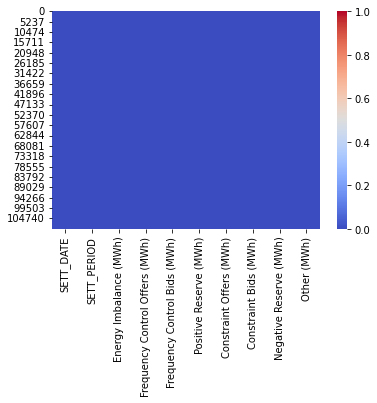

In [105]:
sns.heatmap(Market_Imbalance_Volume.isnull(),cmap='coolwarm')


In [106]:
Market_Imbalance_Volume.isnull().sum()

SETT_DATE                         48
SETT_PERIOD                       48
Energy Imbalance (MWh)            48
Frequency Control Offers (MWh)    48
Frequency Control Bids (MWh)      48
Positive Reserve (MWh)            48
Constraint Offers (MWh)           48
Constraint Bids (MWh)             48
Negative Reserve (MWh)            48
Other (MWh)                       48
dtype: int64

In [107]:
Market_Imbalance_Volume[Market_Imbalance_Volume.isnull().any(axis =1)]

,SETT_DATE,SETT_PERIOD,Energy Imbalance (MWh),Frequency Control Offers (MWh),Frequency Control Bids (MWh),Positive Reserve (MWh),Constraint Offers (MWh),Constraint Bids (MWh),Negative Reserve (MWh),Other (MWh)
85249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
Market_Imbalance_Volume = Market_Imbalance_Volume.dropna()
# we have dropped values of null they are extra columns

In [109]:

import datetime

# Calculate the time interval in minutes and assign it to 'Time Interval' column
Market_Imbalance_Volume['Time Interval'] = (Market_Imbalance_Volume['SETT_PERIOD'] - 1) * 30

# Convert 'Time Interval' column to a time object and assign it to 'Time Format' column
Market_Imbalance_Volume['Time Format'] = Market_Imbalance_Volume['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())

# Convert 'Time Format' column to a string representation of time in 'HH:MM:SS' format
Market_Imbalance_Volume['Time Format'] = Market_Imbalance_Volume['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))

# Combine 'SETT_DATE' and 'Time Format' columns to create a new 'DATETIME' column with datetime objects
Market_Imbalance_Volume['DATETIME'] = pd.to_datetime(Market_Imbalance_Volume['SETT_DATE'] + ' ' + Market_Imbalance_Volume['Time Format'])



In [110]:
Market_Imbalance_Volume = Market_Imbalance_Volume.dropna()

In [111]:
Market_Imbalance_Volume.head()


,SETT_DATE,SETT_PERIOD,Energy Imbalance (MWh),Frequency Control Offers (MWh),Frequency Control Bids (MWh),Positive Reserve (MWh),Constraint Offers (MWh),Constraint Bids (MWh),Negative Reserve (MWh),Other (MWh),Time Interval,Time Format,DATETIME
0,2017-04-01,1.0,-572.883,0.000,-516.195,0.0,325.0,-348.5,0.0,-33.188,0.0,00:00:00,2017-04-01 00:00:00
1,2017-04-01,2.0,-559.190,25.000,-448.892,0.0,325.0,-348.5,0.0,-111.798,30.0,00:30:00,2017-04-01 00:30:00
2,2017-04-01,3.0,-141.802,189.999,-312.807,0.0,325.0,-348.5,0.0,4.506,60.0,01:00:00,2017-04-01 01:00:00
3,2017-04-01,4.0,40.125,260.850,-230.175,0.0,325.0,-348.5,0.0,32.950,90.0,01:30:00,2017-04-01 01:30:00
4,2017-04-01,5.0,139.325,236.083,-209.191,0.0,325.0,-348.5,0.0,135.933,120.0,02:00:00,2017-04-01 02:00:00


In [112]:
Market_Imbalance_Volume.columns


Index(['SETT_DATE', 'SETT_PERIOD', 'Energy Imbalance (MWh)',
       'Frequency Control Offers (MWh)', 'Frequency Control Bids (MWh)',
       'Positive Reserve (MWh)', 'Constraint Offers (MWh)',
       'Constraint Bids (MWh)', 'Negative Reserve (MWh)', 'Other (MWh)',
       'Time Interval', 'Time Format', 'DATETIME'],
      dtype='object')

In [113]:
Market_Imbalance_Volume.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109920 entries, 0 to 109967
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   SETT_DATE                       109920 non-null  object        
 1   SETT_PERIOD                     109920 non-null  float64       
 2   Energy Imbalance (MWh)          109920 non-null  float64       
 3   Frequency Control Offers (MWh)  109920 non-null  float64       
 4   Frequency Control Bids (MWh)    109920 non-null  float64       
 5   Positive Reserve (MWh)          109920 non-null  float64       
 6   Constraint Offers (MWh)         109920 non-null  float64       
 7   Constraint Bids (MWh)           109920 non-null  float64       
 8   Negative Reserve (MWh)          109920 non-null  float64       
 9   Other (MWh)                     109920 non-null  float64       
 10  Time Interval                   109920 non-null  float64

In [115]:
Market_Imbalance_Volume.isnull().sum()


SETT_DATE                         0
SETT_PERIOD                       0
Energy Imbalance (MWh)            0
Frequency Control Offers (MWh)    0
Frequency Control Bids (MWh)      0
Positive Reserve (MWh)            0
Constraint Offers (MWh)           0
Constraint Bids (MWh)             0
Negative Reserve (MWh)            0
Other (MWh)                       0
Time Interval                     0
Time Format                       0
DATETIME                          0
dtype: int64

## Market imbalance cost

##  https://data.nationalgrideso.com/balancing/daily-balancing-costs-balancing-services-use-of-system

In [116]:
import pandas as pd
import glob


# Define the selected filenames or patterns
selected_files_MC = ['q1_cost_fy1718.csv', 'q1_cost_fy1819.csv', 'q1_cost_fy1920.csv','q1_cost_fy2021.csv','q1_cost_fy2122.csv',
                  'q1_cost_fy2223.csv','q1_cost_fy2324.csv']


In [117]:
dataframes = []

# Loop through the selected files
for file_pattern in selected_files_MC:
    df = pd.read_csv(file_pattern)
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
Market_Cost = pd.concat(dataframes, ignore_index=True)


In [118]:
import datetime
#Demand_Data['date'] = Demand_Data['SETTLEMENT_DATE'].apply(lambda x: datetime.strptime(x, '%d %B %Y'))
Market_Cost['Time Interval'] = (Market_Cost['SETT_PERIOD'] - 1) * 30


Market_Cost['Time Format'] = Market_Cost['Time Interval'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(minutes=x)).time())

Market_Cost['Time Format'] = Market_Cost['Time Format'].apply(lambda x: x.strftime('%H:%M:%S'))

Market_Cost['DATETIME'] = pd.to_datetime(Market_Cost['SETT_DATE'] + ' ' + Market_Cost['Time Format'])


In [119]:
Market_Cost.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109870 entries, 0 to 109869
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SETT_DATE          109870 non-null  object        
 1   SETT_PERIOD        109870 non-null  int64         
 2   Energy Imbalance   109870 non-null  float64       
 3   Frequency Control  109870 non-null  float64       
 4   Positive Reserve   109870 non-null  float64       
 5   Negative Reserve   109870 non-null  float64       
 6   Constraints        109870 non-null  float64       
 7   Other              109870 non-null  float64       
 8   Time Interval      109870 non-null  int64         
 9   Time Format        109870 non-null  object        
 10  DATETIME           109870 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 9.2+ MB


<Axes: >

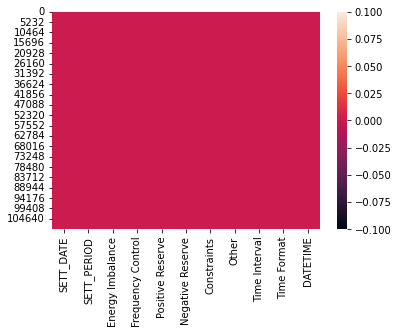

In [120]:
sns.heatmap(Market_Cost.isnull())

In [121]:
Market_Cost.columns


Index(['SETT_DATE', 'SETT_PERIOD', 'Energy Imbalance', 'Frequency Control',
       'Positive Reserve', 'Negative Reserve', 'Constraints', 'Other',
       'Time Interval', 'Time Format', 'DATETIME'],
      dtype='object')

# Merging data 

In [122]:
DD1 = Demand_Data.dropna().reset_index(drop =True)
# we are dropping few rows of years data we dont have data 

In [123]:
DD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78286 entries, 0 to 78285
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SETTLEMENT_DATE            78286 non-null  object        
 1   SETTLEMENT_PERIOD          78286 non-null  int64         
 2   ND                         78286 non-null  int64         
 3   TSD                        78286 non-null  int64         
 4   ENGLAND_WALES_DEMAND       78286 non-null  int64         
 5   EMBEDDED_WIND_GENERATION   78286 non-null  int64         
 6   EMBEDDED_WIND_CAPACITY     78286 non-null  int64         
 7   EMBEDDED_SOLAR_GENERATION  78286 non-null  int64         
 8   EMBEDDED_SOLAR_CAPACITY    78286 non-null  int64         
 9   NON_BM_STOR                78286 non-null  int64         
 10  PUMP_STORAGE_PUMPING       78286 non-null  int64         
 11  IFA_FLOW                   78286 non-null  int64         
 12  IFA2

In [124]:
DD1.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'Time Interval',
       'Time Format', 'DATETIME'],
      dtype='object')

In [125]:
gen_data.head()

,DATETIME,GAS,COAL,NUCLEAR,WIND,HYDRO,IMPORTS,BIOMASS,OTHER,SOLAR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,2009-01-01 00:00:00,8396.0,15038.0,7098.0,273.0,246.0,2506.0,0.0,0.0,0.0,...,7.5,0.0,0.0,0.0,0.0,100.0,22.7,22.7,1.5,69.8
1,2009-01-01 00:30:00,8526.0,15097.0,7086.0,253.0,245.0,2485.0,0.0,0.0,0.0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1
2,2009-01-01 01:00:00,8492.0,15083.0,7073.0,228.0,246.0,2450.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.4,70.2
3,2009-01-01 01:30:00,8335.0,15015.0,7063.0,212.0,246.0,2420.0,0.0,0.0,0.0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1
4,2009-01-01 02:00:00,8304.0,14975.0,7051.0,196.0,246.0,2349.0,0.0,0.0,0.0,...,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.3,70.3


In [126]:
merg1 = pd.merge(Demand_Data, gen_data, on='DATETIME', how='inner') 
#demand data and generation data are merged

In [127]:
merg1.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,IMPORTS_perc,BIOMASS_perc,OTHER_perc,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc
0,01-JAN-2009,1,37910,38704,33939,54,1403,0,0,0,...,7.5,0.0,0.0,0.0,0.0,100.0,22.7,22.7,1.5,69.8
1,01-JAN-2009,2,38047,38964,34072,53,1403,0,0,0,...,7.4,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.5,70.1
2,01-JAN-2009,3,37380,38651,33615,53,1403,0,0,0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.5,22.5,1.4,70.2
3,01-JAN-2009,4,36426,37775,32526,50,1403,0,0,0,...,7.3,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.4,70.1
4,01-JAN-2009,5,35687,37298,31877,50,1403,0,0,0,...,7.1,0.0,0.0,0.0,0.0,100.0,22.6,22.6,1.3,70.3


In [128]:
mid_1.head()

,DATETIME,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
0,2014-01-01 00:00:00,1,35.32,301.50
1,2014-01-01 00:30:00,2,37.28,365.65
2,2014-01-01 01:00:00,3,41.50,184.00
3,2014-01-01 01:30:00,4,36.74,185.15
4,2014-01-01 02:00:00,5,32.04,283.50


In [129]:
merg2 = pd.merge(merg1, mid_1, on='DATETIME', how='inner')
#market index price is merged to previous data

In [130]:
merg2.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
0,01-JAN-2014,1,30008,31920,27048,1084,2434,0,3349,0,...,0.0,0.0,100.0,42.3,42.3,16.4,46.3,1,35.32,301.50
1,01-JAN-2014,2,30589,32491,27625,1079,2434,0,3349,0,...,0.0,0.0,100.0,42.0,42.0,16.4,46.9,2,37.28,365.65
2,01-JAN-2014,3,30306,32521,27361,1079,2434,0,3349,0,...,0.0,0.0,100.0,42.0,42.0,16.5,46.9,3,41.50,184.00
3,01-JAN-2014,4,29280,31735,26447,931,2434,0,3349,0,...,0.0,0.0,100.0,43.4,43.4,17.2,45.2,4,36.74,185.15
4,01-JAN-2014,5,28174,30661,25461,931,2434,0,3349,0,...,0.0,0.0,100.0,44.2,44.2,17.3,45.2,5,32.04,283.50


In [131]:
merg2.tail()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
165668,2023-06-14,23,22446,23931,20010,1112,6538,8892,14285,0,...,26.9,0.0,100.0,55.3,53.3,41.9,25.8,23,68.65,1798.15
165669,2023-06-14,24,22228,23713,19815,1151,6538,9349,14285,0,...,27.8,0.0,100.0,56.0,54.0,42.5,25.8,24,66.66,1782.10
165670,2023-06-14,25,22064,23548,19691,1186,6538,9640,14285,0,...,28.0,0.0,100.0,55.8,53.7,42.2,26.1,25,67.34,1839.85
165671,2023-06-14,26,21893,23377,19606,1220,6538,9804,14285,0,...,27.5,0.0,100.0,55.1,53.0,41.5,27.7,26,59.01,2433.50
165672,2023-06-14,27,21469,22948,19232,1206,6538,9807,14285,0,...,26.8,0.0,100.0,54.7,52.5,41.0,28.3,27,75.80,2974.10


In [132]:
merg2.groupby(merg2['DATETIME'].dt.year).count()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,SOLAR_perc,STORAGE_perc,GENERATION_perc,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh)
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520
2015,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520
2016,17568,17568,17568,17568,17568,17568,17568,17568,17568,17568,...,17568,17568,17568,17568,17568,17568,17568,17568,17568,17568
2017,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520
2018,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520
2019,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520
2020,17568,17568,17568,17568,17568,17568,17568,17568,17568,17568,...,17568,17568,17568,17568,17568,17568,17568,17568,17568,17568
2021,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520
2022,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520,...,17520,17520,17520,17520,17520,17520,17520,17520,17520,17520


In [133]:
merg3 = pd.merge(merg2,SSP__, on = 'DATETIME', how = 'inner')

In [134]:
merg3.groupby(merg3['DATETIME'].dt.year).count()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,LOW_CARBON_perc,ZERO_CARBON_perc,RENEWABLE_perc,FOSSIL_perc,Settlement Period,Market Index Price (£/MWh),Market Index Volume (MWh),Date,Settlement_Period,System Sell Price(GBP/MWh)
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
2015,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
2016,17572,17572,17572,17572,17572,17572,17572,17572,17572,17572,...,17572,17572,17572,17572,17572,17572,17572,17572,17572,17572
2017,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
2018,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
2019,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
2020,17572,17572,17572,17572,17572,17572,17572,17572,17572,17572,...,17572,17572,17572,17572,17572,17572,17572,17572,17572,17572
2021,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524
2022,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524,...,17524,17524,17524,17524,17524,17524,17524,17524,17524,17524


In [135]:
# after 2015 SBP and SSP are same 

In [136]:
merg4 = pd.merge(merg3,Market_Cost, on = 'DATETIME', how = 'inner')

<Axes: >

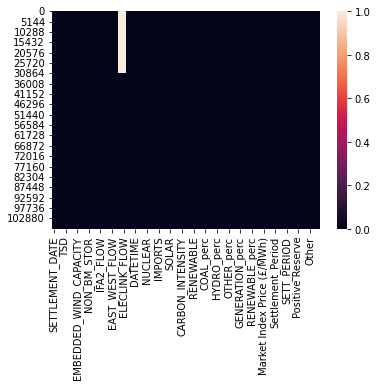

In [137]:
sns.heatmap(merg4.isnull())

In [138]:
merg5 = pd.merge(merg3,Market_Imbalance_Volume, on = 'DATETIME', how = 'inner')

In [139]:
merg5.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'Time Interval_x',
       'Time Format_x', 'DATETIME', 'GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO',
       'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE', 'GENERATION',
       'CARBON_INTENSITY', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL',
       'GAS_perc', 'COAL_perc', 'NUCLEAR_perc', 'WIND_perc', 'HYDRO_perc',
       'IMPORTS_perc', 'BIOMASS_perc', 'OTHER_perc', 'SOLAR_perc',
       'STORAGE_perc', 'GENERATION_perc', 'LOW_CARBON_perc',
       'ZERO_CARBON_perc', 'RENEWABLE_perc', 'FOSSIL_perc',
       'Settlement Period', 'Market Index Price (£/MWh)',
       'Market Index Volume (MWh)', 'Date', 'Se

<Axes: >

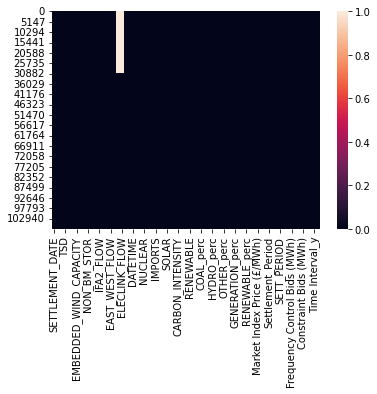

In [140]:
sns.heatmap(merg5.isnull())

In [141]:
merg5.columns

Index(['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD',
       'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
       'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
       'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING',
       'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW',
       'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'Time Interval_x',
       'Time Format_x', 'DATETIME', 'GAS', 'COAL', 'NUCLEAR', 'WIND', 'HYDRO',
       'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR', 'STORAGE', 'GENERATION',
       'CARBON_INTENSITY', 'LOW_CARBON', 'ZERO_CARBON', 'RENEWABLE', 'FOSSIL',
       'GAS_perc', 'COAL_perc', 'NUCLEAR_perc', 'WIND_perc', 'HYDRO_perc',
       'IMPORTS_perc', 'BIOMASS_perc', 'OTHER_perc', 'SOLAR_perc',
       'STORAGE_perc', 'GENERATION_perc', 'LOW_CARBON_perc',
       'ZERO_CARBON_perc', 'RENEWABLE_perc', 'FOSSIL_perc',
       'Settlement Period', 'Market Index Price (£/MWh)',
       'Market Index Volume (MWh)', 'Date', 'Se

In [142]:
selected = [ 'DATETIME', 'ND', 'TSD','ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION',
'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION',
'EMBEDDED_SOLAR_CAPACITY', 'PUMP_STORAGE_PUMPING','GAS', 'COAL',
'NUCLEAR', 'WIND', 'HYDRO', 'IMPORTS', 'BIOMASS', 'OTHER', 'SOLAR',
'STORAGE', 'GENERATION', 'RENEWABLE', 'FOSSIL',
'Market Index Price (£/MWh)', 'Market Index Volume (MWh)',
'System Sell Price(GBP/MWh)','Energy Imbalance (MWh)']

In [143]:
final_df = merg5[selected]

<Axes: >

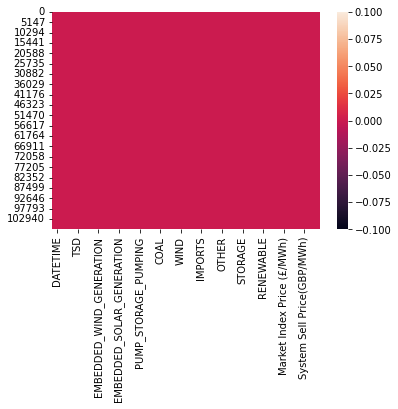

In [144]:
sns.heatmap(final_df.isnull())

In [145]:
final_df.to_csv('final_df.csv')

In [146]:
final_df

,DATETIME,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,PUMP_STORAGE_PUMPING,GAS,...,OTHER,SOLAR,STORAGE,GENERATION,RENEWABLE,FOSSIL,Market Index Price (£/MWh),Market Index Volume (MWh),System Sell Price(GBP/MWh),Energy Imbalance (MWh)
0,2017-04-01 00:00:00,23874,24937,21784,1159,4831,0,11750,526,8940.0,...,2070.0,0.0,0.0,26093.0,4024.0,9515.0,24.27,126.05,22.00950,-572.883
1,2017-04-01 00:30:00,23137,24507,21095,1114,4831,0,11750,870,9269.0,...,2069.0,0.0,0.0,26469.0,3891.0,9908.0,25.11,309.60,22.15351,-559.190
2,2017-04-01 01:00:00,23168,24751,21188,1070,4831,0,11750,1040,9297.0,...,2085.0,0.0,0.0,26675.0,3817.0,9976.0,29.81,461.15,28.75000,-141.802
3,2017-04-01 01:30:00,23548,25148,21607,1027,4831,0,11750,1100,9148.0,...,2088.0,0.0,0.0,26421.0,3667.0,9792.0,30.30,422.00,50.50000,40.125
4,2017-04-01 02:00:00,23209,25404,21309,966,4831,0,11750,1695,8998.0,...,2090.0,0.0,0.0,26106.0,3587.0,9579.0,30.44,528.65,50.98269,139.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108065,2023-05-31 21:30:00,25826,27226,23515,1353,6538,0,13081,6,8551.0,...,144.0,0.0,28.0,25294.0,6734.0,8551.0,86.16,1442.90,31.00000,-44.620
108066,2023-05-31 22:00:00,24836,26248,22570,1348,6538,0,13081,6,7712.0,...,115.0,0.0,0.0,24235.0,6594.0,7712.0,89.27,1382.15,30.55000,181.377
108067,2023-05-31 22:30:00,23744,25226,21589,1342,6538,0,13081,5,7757.0,...,116.0,0.0,0.0,23251.0,6406.0,7757.0,74.86,1514.10,0.00000,-135.464
108068,2023-05-31 23:00:00,22483,23965,20392,1301,6538,0,13081,5,7448.0,...,122.0,0.0,0.0,22780.0,6256.0,7448.0,60.89,1029.90,0.00000,3.081


In [149]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ND,108070.0,28367.684547,6557.685694,13367.000,23219.00000,27709.000,32603.000,49807.000
TSD,108070.0,29939.029573,6283.371677,16513.000,25072.00000,29255.000,33772.000,50608.000
ENGLAND_WALES_DEMAND,108070.0,25917.055159,5996.370222,0.000,21202.00000,25269.000,29812.000,46356.000
EMBEDDED_WIND_GENERATION,108070.0,1680.034903,1010.204265,172.000,867.00000,1471.000,2300.000,5354.000
EMBEDDED_WIND_CAPACITY,108070.0,6217.407060,431.231904,4831.000,5913.00000,6527.000,6527.000,6574.000
EMBEDDED_SOLAR_GENERATION,108070.0,1346.117452,2068.645174,0.000,0.00000,13.000,2200.000,9830.000
EMBEDDED_SOLAR_CAPACITY,108070.0,13097.140909,421.591738,11750.000,13052.00000,13080.000,13080.000,13861.000
PUMP_STORAGE_PUMPING,108070.0,245.585306,454.137086,0.000,7.00000,11.000,193.750,2004.000
GAS,108070.0,12426.141270,5361.426129,1567.000,8158.00000,12279.000,16511.000,27472.000
COAL,108070.0,873.414324,1479.450103,0.000,0.00000,375.000,1000.000,11315.000
